<a href="https://colab.research.google.com/github/caiogasparine/SCS_3253_061-Machine-Learning/blob/main/Toronto_Police_MCI_with_pyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Toronto Police / MCI indicators
### Created on March 16, 2023 / Last update March 16, 2023
### Pycaret version
### https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb
###

import numpy as np
import pandas as pd
from datetime import date
import warnings                    #These 2 lines remove all the warnigns in the code  
warnings.filterwarnings("ignore")  #These 2 lines remove all the warnigns in the code  
from google.colab import drive
from google.colab import data_table        #Mar 16, 2023 - Interactive Tables for DataFrames 
data_table.enable_dataframe_formatter()    #Mar 16, 2023 - Interactive Tables for Dataframes 

#!pip install pycaret
!pip install --pre pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.1/480.1 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing

In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.0.0.rc9'

In [3]:
### Change the code here, depending on your dataset location
### data = pd.read_csv('Major_Crime_Indicators.csv', header=0)
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Major_Crime_Indicators.csv', header=0)

Mounted at /content/drive


In [4]:
data.shape

(301233, 30)

In [5]:
data.head(5)

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.850398e+06,5.429359e+06,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8.818405e+06,5.436836e+06,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8.853791e+06,5.402071e+06,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8.832822e+06,5.419628e+06,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8.853452e+06,5.410706e+06,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5


In [6]:
### Exploring the data to gain insigths
### Defining our scope with years with complete data year = 2013 ONLY

### ocurrencedate min = 9/6/1966 and year = NULL AND ocurrencedata max = 30/06/2022
### Clearning the dataset to have only the occurences for 2013 to save computing
data = data[data.occurrenceyear == 2013]

In [7]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 30)"
2,Transformed data shape,"(596, 1371)"
3,Numeric features,16
4,Categorical features,14
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [8]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [9]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [10]:
# init setup on exp
exp.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 30)"
2,Transformed data shape,"(596, 1371)"
3,Numeric features,16
4,Categorical features,14
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [11]:
## CREATE MODEL


In [12]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7135,453601.5549,0.4025,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [13]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [14]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9915,187705.0731,0.0131,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [15]:
## ASSIGN MODEL


In [16]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId,Cluster
0,-8840854.0,5412123.5,208,GO-20141275836,D14,2013/12/31 05:00:00+00,2014/01/03 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2132,...,365.0,Tuesday,11,Theft Over,81,Trinity-Bellwoods,-79.418747,43.654457,8,Cluster 0
1,-8840317.0,5409695.0,216,GO-20141275533,D14,2013/12/18 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,2120,...,352.0,Wednesday,19,Break and Enter,82,Niagara,-79.413918,43.638672,16,Cluster 0
2,-8822241.0,5426445.0,229,GO-20141275619,D43,2013/12/20 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,354.0,Friday,3,Auto Theft,127,Bendale,-79.251541,43.747467,29,Cluster 0
3,-8841433.0,5420008.0,243,GO-20141279054,D53,2013/11/27 05:00:00+00,2014/01/04 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1420,...,331.0,Wednesday,20,Assault,102,Forest Hill North,-79.423950,43.705681,43,Cluster 0
4,-8841075.0,5423336.5,254,GO-20141279637,D32,2013/12/25 05:00:00+00,2014/01/04 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,359.0,Wednesday,18,Break and Enter,39,Bedford Park-Nortown,-79.420731,43.727291,54,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,-8842066.0,5433651.0,271385,GO-20211819377,D32,2013/09/01 04:00:00+00,2021/09/22 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,...,244.0,Sunday,0,Assault,36,Newtonbrook West,-79.429634,43.794212,271441,Cluster 3
592,-8828027.0,5420954.5,272165,GO-20211873191,D55,2013/01/01 05:00:00+00,2021/09/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,...,1.0,Tuesday,0,Assault,54,OConnor-Parkview,-79.303520,43.711826,272884,Cluster 3
593,-8825024.0,5417692.5,276174,GO-20212138598,D41,2013/10/01 04:00:00+00,2021/11/06 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,1430,...,274.0,Tuesday,14,Assault,122,Birchcliffe-Cliffside,-79.276543,43.690643,276210,Cluster 3
594,-8834612.0,5412888.5,289495,GO-2022526645,D51,2013/01/01 05:00:00+00,2022/03/21 04:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,1.0,Tuesday,0,Assault,72,Regent Park,-79.362671,43.659428,289995,Cluster 3


In [17]:
## ANALYSE MODEL

In [18]:
# plot pca cluster plot 
plot_model(kmeans, plot = 'cluster')

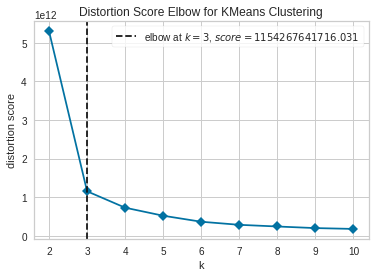

In [19]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

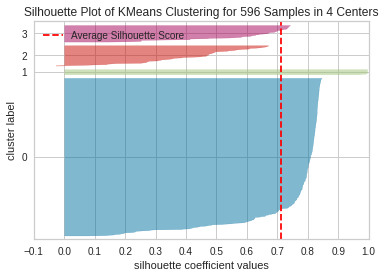

In [20]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [21]:
# check docstring to see available plots 
# help(plot_model)
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
##PREDICTION

In [23]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,X,Y,Index_,event_unique_id_GO-20141275836,event_unique_id_GO-20141275533,event_unique_id_GO-20141275619,event_unique_id_GO-20141279054,event_unique_id_GO-20141279637,event_unique_id_GO-20141281791,event_unique_id_GO-20141275615,...,Neighbourhood_Broadview North,Neighbourhood_Kingsway South,Neighbourhood_High Park North,Neighbourhood_Cliffcrest,Neighbourhood_St.Andrew-Windfields,Neighbourhood_Alderwood,Longitude,Latitude,ObjectId,Cluster
7,-8.840854e+06,5.412123e+06,208.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.418745,43.654456,8.0,Cluster 0
15,-8.840317e+06,5.409695e+06,216.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.413916,43.638670,16.0,Cluster 0
28,-8.822241e+06,5.426445e+06,229.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.251540,43.747469,29.0,Cluster 0
42,-8.841433e+06,5.420008e+06,243.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.423947,43.705682,43.0,Cluster 0
53,-8.841075e+06,5.423337e+06,254.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.420731,43.727292,54.0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271440,-8.842066e+06,5.433651e+06,271385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.429631,43.794213,271441.0,Cluster 3
272883,-8.828027e+06,5.420954e+06,272165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.303517,43.711826,272884.0,Cluster 3
276209,-8.825024e+06,5.417692e+06,276174.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.276540,43.690642,276210.0,Cluster 3
289994,-8.834612e+06,5.412888e+06,289495.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-79.362674,43.659429,289995.0,Cluster 3


In [24]:
## SAVE MODEL

In [25]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['X', 'Y', 'Index_', 'ucr_code',
                                              'ucr_ext', 'reportedyear',
                                              'reportedday', 'reporteddayofyear',
                                              'reportedhour', 'occurrenceyear',
                                              'occurrenceday',
                                              'occurrencedayofyear',
                                              'occurrencehour', 'Longitude',
                                              'Latitude', 'ObjectId'],
                                     transformer=SimpleImputer())),
                 ('cate...
                                     transformer=OneHotEncoder(cols=['event_unique_id',
                                                                     'Division',
                                                     

In [26]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['X', 'Y', 'Index_', 'ucr_code',
                                             'ucr_ext', 'reportedyear',
                                             'reportedday', 'reporteddayofyear',
                                             'reportedhour', 'occurrenceyear',
                                             'occurrenceday',
                                             'occurrencedayofyear',
                                             'occurrencehour', 'Longitude',
                                             'Latitude', 'ObjectId'],
                                    transformer=SimpleImputer())),
                ('cate...
                                    transformer=OneHotEncoder(cols=['event_unique_id',
                                                                    'Division',
                                                                    'occurrencedate',
                                                                    'reporteddate',
                                                                    'location_type',
                                                                    'premises_type',
                                                                    'offence',
                                                                    'reportedmonth',
                                                                    'reporteddayofweek',
                                                                    'occurrencemonth',
                                                                    'occurrencedayofweek',
                                                                    'mci_category',
                                                                    'Hood_ID',
                                                                    'Neighbourhood'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [27]:
## Detailed function-by-function overview

In [28]:
# init setup
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(596, 30)"
2,Transformed data shape,"(596, 1371)"
3,Numeric features,16
4,Categorical features,14
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1
